# Feature-Engineering
## DAVE3625 - Introduksjon til Kunstig Intelligens
Collaborators: Vidar Ermesjø (s318075) / Sigurd Blankholm Heggemsnes (s313853)

In [1]:
import pandas as panda
import matplotlib
from matplotlib import pyplot as plot

### Dataset:

In [2]:
data = panda.read_csv("Ruter_data.csv", skiprows=0, delimiter=';', names=None)

In [3]:
# Random samples from dataset:
data.sample(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
275,34028-2020-07-28T17:59:00+02:00,28/07/2020,Viken,Nordøst,Lillestrøm,Roald Amundsens gate,Leiv Eirikssons gate,Lokal,Viken,320,0,18:14:34,18:14:39,18:14:00,18:14:00,105,0
1702,38003-2020-08-16T17:06:00+02:00,16/08/2020,Viken,Nordøst,Nittedal,Gjelleråsen,Gjelleråstoppen,Lokal,Viken,380,1,17:34:56,17:36:14,17:36:00,17:36:00,115,4
5420,3121-2020-08-18T09:27:00+02:00,18/08/2020,Viken,Vest,Bærum,Fornebuparken (mot E18),Lilløyveien (mot E18),Lokal,Oslo,31,0,09:32:46,09:33:14,09:30:00,09:30:00,151,11
530,2812-2020-08-17T14:38:00+02:00,17/08/2020,Oslo,Indre By,St.Hanshaugen,Ullevål sykehus (mot Lindern),Fayes gate (mot Geitmyrsveien),Lokal,Oslo,28,0,15:04:26,15:05:02,15:05:00,15:05:00,106,22
5846,12003-2020-07-29T20:30:00+02:00,29/07/2020,Viken,Nordøst,Lillestrøm,Rettenveien,Nordens vei,Lokal,Viken,381,1,20:46:56,20:47:22,20:42:00,20:42:00,72,0
2811,47005-2020-07-27T09:13:00+02:00,27/07/2020,Viken,Nordøst,Lillestrøm,Holtedalveien,Stensrud,Lokal,Viken,480,0,09:54:01,09:54:03,09:51:00,09:51:00,106,7
4091,34007-2020-06-24T13:50:00+02:00,24/06/2020,Viken,Nordøst,Rælingen,Eikeliveien,Lillestrøm bussterminal (Plattform 3),Lokal,Viken,330,0,14:02:31,14:02:35,14:02:00,14:02:00,105,3
3559,42502-2020-06-12T14:10:00+02:00,12/06/2020,Viken,Nordøst,Gjerdrum,Nitteberg,Smedhaugen,Lokal,Viken,405,0,14:21:29,14:22:22,14:22:00,14:22:00,80,8
2061,15005-2020-07-22T05:54:00+02:00,22/07/2020,Viken,Vest,Bærum,Tjernsmyr,Lysaker stasjon (E18 mot Vækerø) (plf G),Lokal,Viken,150,0,06:25:23,06:25:28,06:24:00,06:24:00,112,11
1387,25004-2020-08-26T21:12:00+02:00,26/08/2020,Viken,Vest,Asker,Hvalstrand,Hval,Lokal,Viken,250,0,21:55:15,21:55:18,21:54:00,21:54:00,112,10


In [4]:
# Number of records and fieldnames in dataset:
data.shape

(6000, 17)

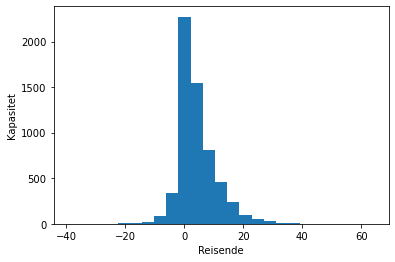

In [5]:
# HÆÆÆ?
plot.hist(data.Passasjerer_Ombord, bins=25, rwidth=1)
plot.xlabel('Reisende')
plot.ylabel('Kapasitet')
plot.show()

In [6]:
data.shape

(6000, 17)

In [16]:
threshold_max = data['Passasjerer_Ombord'].quantile(0.999)
threshold_max

42.00300000000334

In [17]:
data[data['Passasjerer_Ombord']>threshold_max]


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
1506,30004-2020-08-26T07:11:00+02:00,26/08/2020,Oslo,Nordøst,Alna,Trosterud (E6 mot Furuset),Furuset skole (sydsiden E6 fra sentrum),Lokal,Viken,300,1,07:29:47,07:30:14,07:25:00,07:25:00,106,45
2830,26117-2020-08-20T15:41:00+02:00,20/08/2020,Viken,Vest,Lier,Gullaug,Gullaugkleiva,Lokal,Viken,261,0,16:17:39,16:17:45,16:00:00,16:00:00,112,52
2831,26117-2020-08-20T15:41:00+02:00,20/08/2020,Viken,Vest,Lier,Gullaug,Gullaugkleiva,Lokal,Viken,261,0,16:17:39,16:17:45,16:00:00,16:00:00,112,52
3452,27004-2020-08-11T15:57:00+02:00,11/08/2020,Viken,Vest,Asker,Trollstua (mot Dikemark),Sportstuen (mot Vardåsen),Lokal,Viken,280,1,16:04:40,16:05:08,16:04:00,16:04:00,80,64
4205,40003-2020-08-24T07:51:00+02:00,24/08/2020,Viken,Nordøst,Ullensaker,Lystad (Ullensaker),Aspervegen,Skole,Viken,3874,0,08:08:36,08:08:38,08:07:00,08:07:00,106,45
5514,27004-2020-08-11T15:57:00+02:00,11/08/2020,Viken,Vest,Asker,Trollstua (mot Dikemark),Sportstuen (mot Vardåsen),Lokal,Viken,280,1,16:04:40,16:05:08,16:04:00,16:04:00,80,64
